In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data = pd.read_csv('new_dataset.csv')

In [ ]:
# Encode categorical variables
data = pd.get_dummies(data)

# Split data into features (X) and target variable (y)
X = data.drop('_MICHD', axis=1)
y = data['_MICHD']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Print the metric scores for the training set
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Training Confusion Matrix:\n{conf_matrix_train}')
print(f'Training Classification Report:\n{class_report_train}')

Training Accuracy: 1.00
Training Confusion Matrix:
[[290329      6]
 [    11 290386]]
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    290335
           1       1.00      1.00      1.00    290397

    accuracy                           1.00    580732
   macro avg       1.00      1.00      1.00    580732
weighted avg       1.00      1.00      1.00    580732



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.90
Confusion Matrix:
[[65719  6904]
 [ 7029 65532]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     72623
           1       0.90      0.90      0.90     72561

    accuracy                           0.90    145184
   macro avg       0.90      0.90      0.90    145184
weighted avg       0.90      0.90      0.90    145184



In [ ]:
pip install matplotlib seaborn

     ------------------------------------ 294.6/294.6 kB 586.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


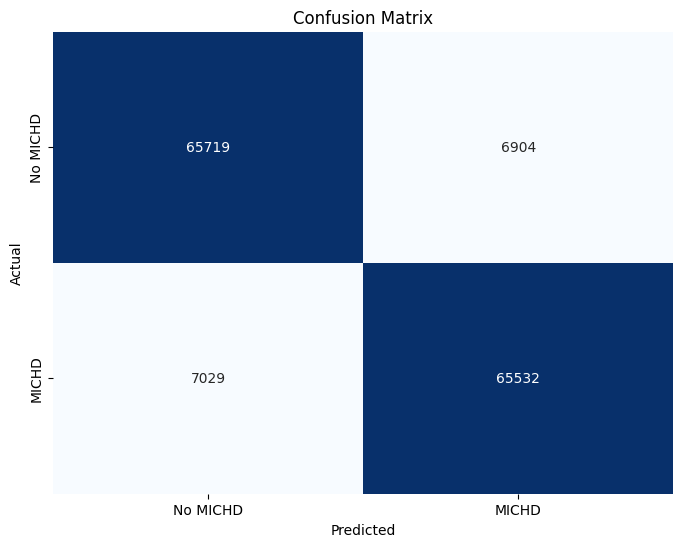

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No MICHD', 'MICHD'],
            yticklabels=['No MICHD', 'MICHD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

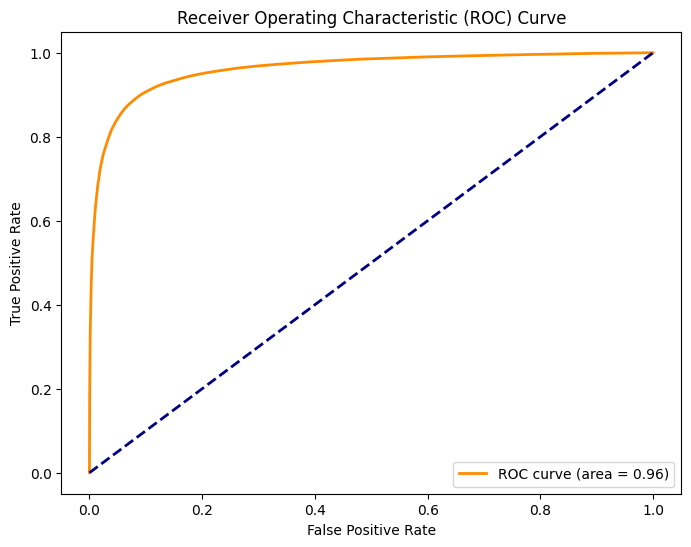

In [ ]:
# ROC Curve (if applicable)
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define scoring functions
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(rf_classifier, X_train, y_train, cv=kf, scoring=scoring)

# Print the average scores
print(f"Cross-Validation Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Cross-Validation Precision: {np.mean(cv_results['test_precision'])}")
print(f"Cross-Validation Recall: {np.mean(cv_results['test_recall'])}")
print(f"Cross-Validation F1 Score: {np.mean(cv_results['test_f1_score'])}")


Cross-Validation Accuracy: 0.8933656157727607
Cross-Validation Precision: 0.8950372259206562
Cross-Validation Recall: 0.8912776556266063
Cross-Validation F1 Score: 0.8931524371745461


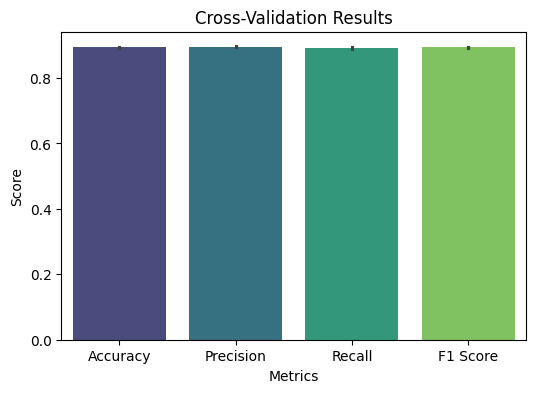

In [ ]:
# Extract individual fold results
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1_score']

# Combine scores into a single array for plotting
all_scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a grouped bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=all_scores, palette='viridis')

plt.title('Cross-Validation Results')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(ticks=[0, 1, 2, 3], labels=score_labels)
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


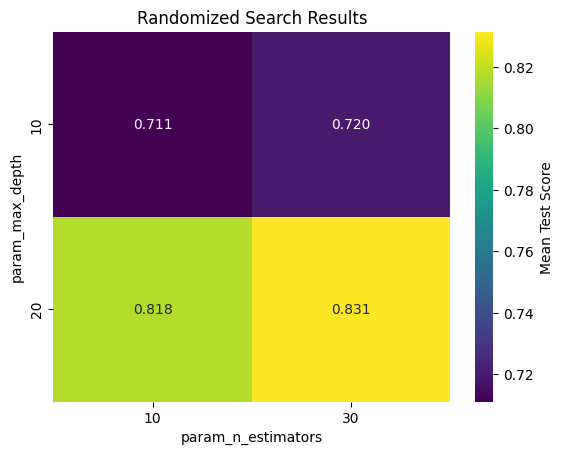

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
# Define the parameter distributions for randomized search
param_dist = {
    'n_estimators': [10, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Use RandomizedSearchCV to perform hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                    n_iter=10, scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Extract results and convert to a DataFrame
random_results = pd.DataFrame(random_search.cv_results_)

# Visualize randomized search results with a heatmap
heatmap_data_random = random_results.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(heatmap_data_random, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Mean Test Score'})
plt.title('Randomized Search Results')
plt.show()